<a href="https://colab.research.google.com/github/coderaivn/Seaborn-tutorial/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**The datasets are support in library Seaborn**

In [ ]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


# Styling

In [ ]:
sns.set_theme()

# Numerical plot


*  Distribution: Histogram, KDE (Kernel Density Estimate), Displot
*  Bar Plot
*  Count Plot
*  Box Plot: Phương pháp để mô tả bằng đồ thị các nhóm dữ liệu số thông qua các phần tư của chúng
*  Facet Plot: tạo ra một lưới 2d gồm các bảng được xác định bởi các biến tạo thành các hàng và cột.
*  Join Plot
*  Pair Plot
*  Heat Map: một kỹ thuật trực quan hóa dữ liệu cho thấy cường độ của một hiện tượng là màu sắc ở hai chiều













#Distribution plot




In [ ]:
tip_df = sns.load_dataset("tips")
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Histogram plot

<Axes: xlabel='total_bill', ylabel='Count'>

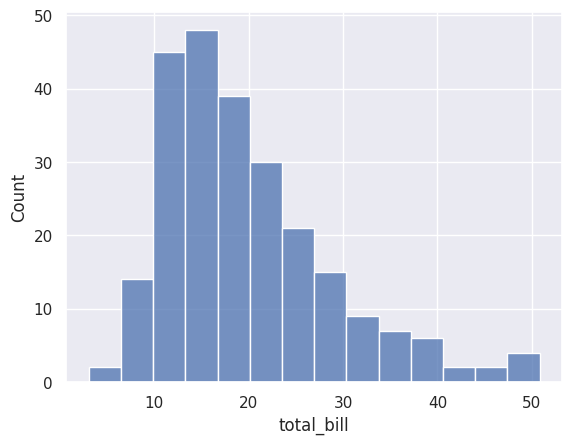

In [ ]:
sns.histplot(data=tip_df["total_bill"])

<Axes: xlabel='total_bill', ylabel='Count'>

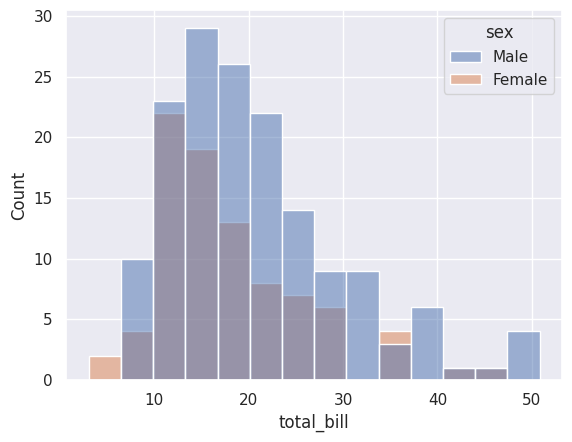

In [ ]:
sns.histplot(data=tip_df,x="total_bill",hue="sex")

# kde plot
A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram.
KDE represents the data using a continuous probability density curve in one or more dimensions

<Axes: xlabel='total_bill', ylabel='Density'>

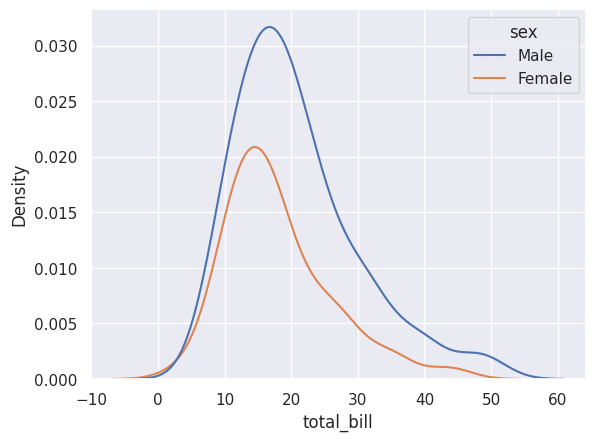

In [ ]:
sns.kdeplot(data=tip_df,x='total_bill',hue='sex')

#Bonus Displot

Informative distributional summaries

Statistical analyses require knowledge about the distribution of variables in your dataset.

The seaborn function displot() supports several approaches to visualizing distributions. These include classic techniques like histograms and computationally-intensive approaches like kernel density estimation

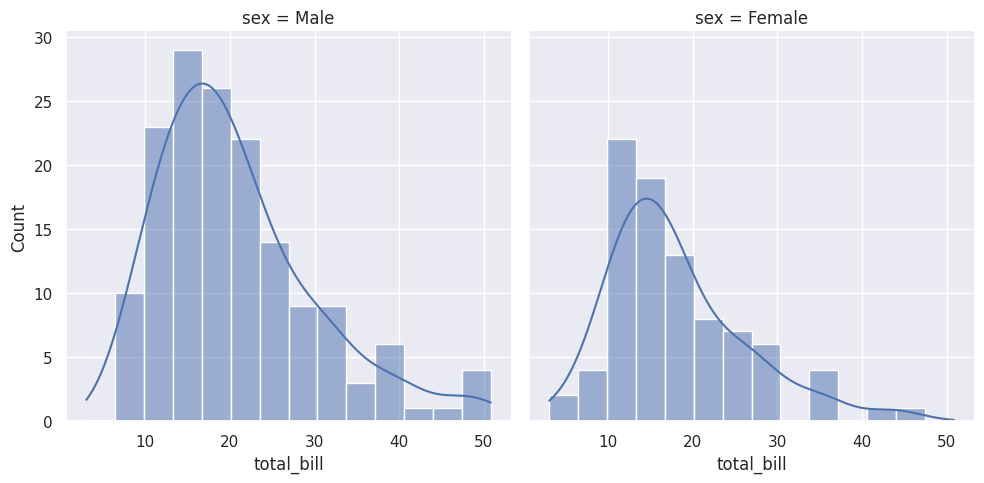

In [ ]:
sns.displot(data=tip_df,x="total_bill",kde="total_bill",col="sex")

#Categorical Plots
Bar Plots



<Axes: xlabel='sex', ylabel='tip'>

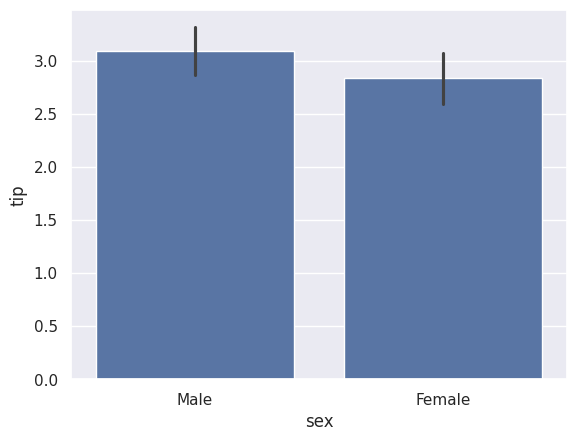

In [ ]:
sns.barplot(data=tip_df,x="sex",y="tip",estimator=np.mean)

#Count Plot


In [ ]:
tip_df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

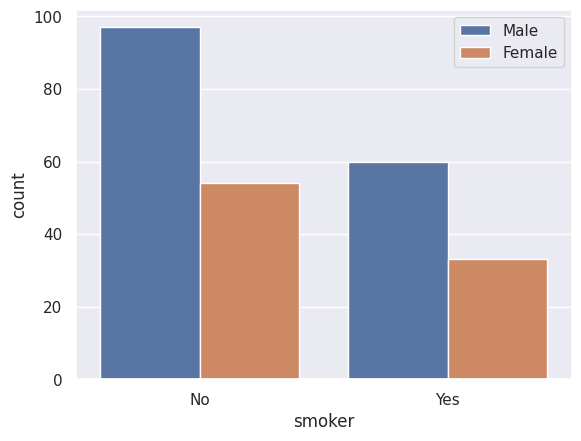

In [ ]:
sns.countplot(data=tip_df,x='smoker',hue="sex",order=['No','Yes'])
plt.legend()

#Box Plot
Box Plot is a good indication of how the values in the data are spread out ("minium", first quartile (Q1), median, third quartile (Q3), and “maximum”)

+ Identify outliers

+ Check if data is symmetrical

+ Determine how tightly data is grouped

Resource: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

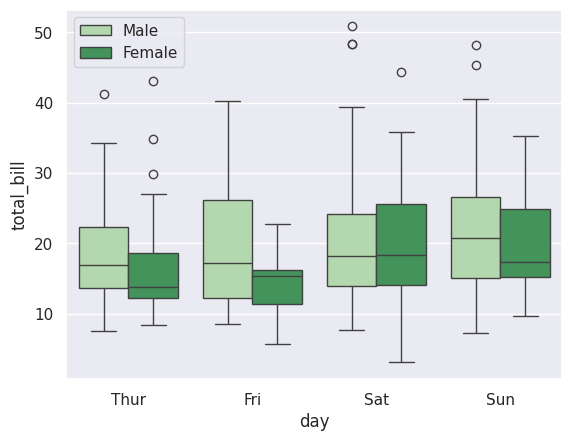

In [ ]:
sns.boxplot(data=tip_df,x="day",y="total_bill",hue="sex",palette="Greens")
plt.legend()

#Facet Grid

+ FacetGrid can be drawn with up to three dimensions: row, col, and hue.
+The main approach for visualizing data on this grid is with the FacetGrid.map() method

In [ ]:
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


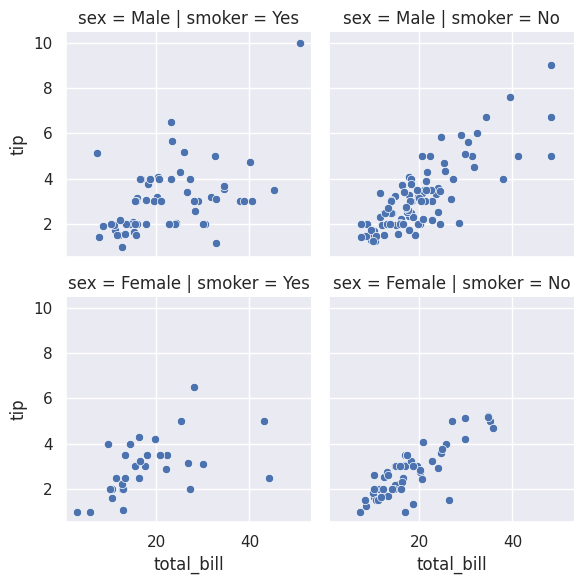

In [ ]:
tip_fg=sns.FacetGrid(data=tip_df,col='smoker',row='sex')
tip_fg.map(sns.scatterplot,'total_bill','tip')

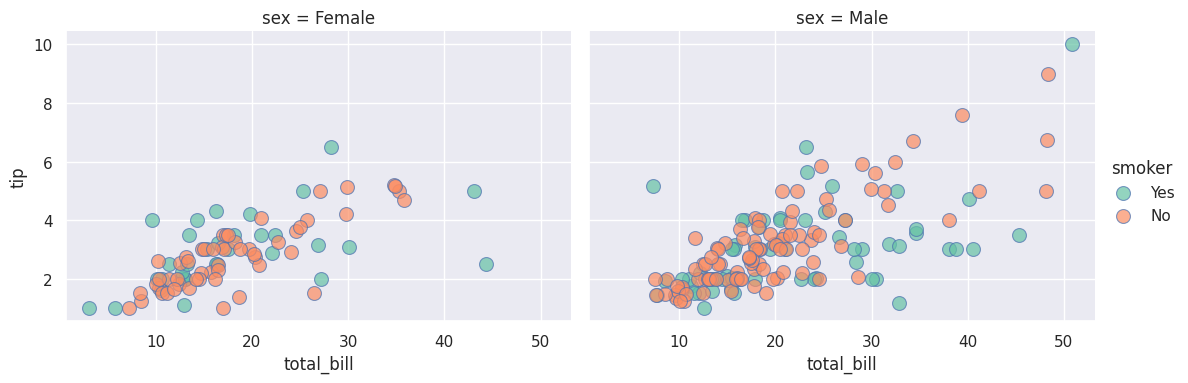

In [ ]:
kws= dict(s=100, edgecolor='b', alpha=.7)
new_fg1 = sns.FacetGrid(data=tip_df, col="sex",
                       hue="smoker",
                       col_order=["Female", "Male"],
                       palette='Set2',
                       height=4, aspect=1.4,
                       legend_out=True)

new_fg1.map(sns.scatterplot, 'total_bill', 'tip', **kws)

new_fg1.add_legend();